In [1]:
# GET DATA
import pandas as pd
import numpy as np
from get_data import get_assets, get_positional_data

get_assets()
positions = get_positional_data()


This process will pip install Kaggle and download data through Kaggle API.

Please confirm that you've downloaded Kaggle JSON credentials into directory

Data Successfully Downloaded


In [17]:
import form_pred
import importlib
importlib.reload(form_pred)
from form_pred import clean_positional
import ball_movement
import importlib
importlib.reload(ball_movement)
from ball_movement import ball_quadrants, make_quad_chart

quads = ball_quadrants(positions,4)
clean_pos = clean_positional(positions)

#These files ran already for me in demo.ipynb .
d_test = pd.read_csv('assets/def_clean_output_test.csv')
d_train = pd.read_csv('assets/def_clean_output.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (38,47,50,53,56,59,77,86,89,92,104,107,116,125,128,146,149,161,173,176,179,188,194,203,212) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
#setting missing columns as all zeroes for Test set
for missing_col in set(d_train.columns).difference(d_test.columns):
    d_test[missing_col] = np.NaN

for missing_col in set(d_test.columns).difference(d_train.columns):
    d_train[missing_col] = np.NaN

In [19]:
d_test.shape

(3073, 221)

In [20]:
d_train.shape

(13964, 221)

In [23]:
d_full = pd.concat([d_train,d_test])

In [21]:
clean_pos

,CBL0_x,CBR0_x,DEL0_x,DER0_x,DLL0_x,DLR0_x,DTL0_x,DTL1_x,DTR0_x,FBL0_x,...,WRL1_in,WRL2_in,WRL3_in,WRR0_in,WRR1_in,WRR2_in,WRR3_in,gameId,playId,offenseFormation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.12,...,True,False,False,False,False,False,False,2018090600,75,I_FORM
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,True,True,False,False,2018090600,146,SINGLEBACK
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,True,False,False,False,2018090600,168,SHOTGUN
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,True,True,True,False,2018090600,190,SHOTGUN
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,False,False,False,False,2018090600,256,SHOTGUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,True,False,False,False,2018123015,3819,SINGLEBACK
111225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,True,True,False,False,2018123015,3932,SHOTGUN
111231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,True,True,False,False,False,False,False,2018123015,3969,SHOTGUN
111237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,True,False,False,True,False,False,False,2018123015,4057,SHOTGUN


In [36]:
full = clean_pos.merge(d_full, how = 'inner',left_on = ['gameId','playId'], right_on = ['gameId','playId']).merge(quads, how ='inner', left_on = ['gameId','playId'], right_on = ['gameId','playId'])

In [37]:
full

,CBL0_x,CBR0_x,DEL0_x,DER0_x,DLL0_x,DLR0_x,DTL0_x,DTL1_x,DTR0_x,FBL0_x,...,x_zero_base1,y_zero_base1,x_vec,y_vec,passResult,playDescription,down,yardsToGo,x_quad,y_quad
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.12,...,36.71,6.83,6.82,-19.62,C,(15:00) M.Ryan pass short right to J.Jones pus...,1,15,2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,74.69,16.91,3.86,-6.53,I,(13:10) M.Ryan pass incomplete short right to ...,1,10,2,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,68.41,47.49,-2.54,23.99,I,(13:05) (Shotgun) M.Ryan pass incomplete short...,2,10,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,92.83,41.47,22.83,17.85,C,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,3,10,4,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,110.95,10.88,2.69,-18.60,I,(10:59) (Shotgun) M.Ryan pass incomplete short...,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,46.38,30.52,11.59,3.63,C,(6:20) J.Rosen pass short middle to T.Sherfiel...,1,10,3,2
17007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,65.43,35.06,12.58,8.52,C,(5:42) J.Rosen pass short middle to C.Williams...,1,10,3,2
17008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,97.93,24.65,25.47,-4.66,I,(2:00) (Shotgun) J.Rosen pass incomplete deep ...,3,12,4,1
17009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,39.31,38.78,1.79,14.98,C,"(1:29) (No Huddle, Shotgun) R.Wilson pass shor...",2,6,2,3


In [45]:
action_cols = []
for c in full.columns:
    if "_act" in c:
        action_cols.append(c)

    print(c)

CBL0_x
CBR0_x
DEL0_x
DER0_x
DLL0_x
DLR0_x
DTL0_x
DTL1_x
DTR0_x
FBL0_x
FBR0_x
FSL0_x
HBL0_x
HBL1_x
HBR0_x
HBR1_x
QB0_x
QB1_x
RBL0_x
RBL1_x
RBL2_x
RBR0_x
RBR1_x
RBR2_x
TEL0_x
TEL1_x
TEL2_x
TER0_x
TER1_x
TER2_x
WRL0_x
WRL1_x
WRL2_x
WRL3_x
WRR0_x
WRR1_x
WRR2_x
WRR3_x
CBL0_y
CBR0_y
DEL0_y
DER0_y
DLL0_y
DLR0_y
DTL0_y
DTL1_y
DTR0_y
FBL0_y
FBR0_y
FSL0_y
HBL0_y
HBL1_y
HBR0_y
HBR1_y
QB0_y
QB1_y
RBL0_y
RBL1_y
RBL2_y
RBR0_y
RBR1_y
RBR2_y
TEL0_y
TEL1_y
TEL2_y
TER0_y
TER1_y
TER2_y
WRL0_y
WRL1_y
WRL2_y
WRL3_y
WRR0_y
WRR1_y
WRR2_y
WRR3_y
CBL0_in
CBR0_in
DEL0_in
DER0_in
DLL0_in
DLR0_in
DTL0_in
DTL1_in
DTR0_in
FBL0_in
FBR0_in
FSL0_in
HBL0_in
HBL1_in
HBR0_in
HBR1_in
QB0__in
QB1__in
RBL0_in
RBL1_in
RBL2_in
RBR0_in
RBR1_in
RBR2_in
TEL0_in
TEL1_in
TEL2_in
TER0_in
TER1_in
TER2_in
WRL0_in
WRL1_in
WRL2_in
WRL3_in
WRR0_in
WRR1_in
WRR2_in
WRR3_in
gameId
playId
offenseFormation
CBL0_act
CBL0_x_start
CBL0_y_start
CBL1_act
CBL1_x_start
CBL1_y_start
CBL2_act
CBL2_x_start
CBL2_y_start
CBL3_act
CBL3_x_start
CBL3_y_sta

In [86]:
y = full[['x_quad','y_quad']]
y['class'] = y['x_quad'].astype(str) + "," + y['y_quad'].astype(str)
y


<ipython-input-86-35870ca11927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['x_quad'].astype(str) + "," + y['y_quad'].astype(str)


,x_quad,y_quad,class
0,2,0,"2,0"
1,2,1,"2,1"
2,1,3,"1,3"
3,4,3,"4,3"
4,3,0,"3,0"
...,...,...,...
17006,3,2,"3,2"
17007,3,2,"3,2"
17008,4,1,"4,1"
17009,2,3,"2,3"


In [49]:
model = full.drop(['x1','y1','x_zero_base1','y_zero_base1','x_vec','y_vec','passResult','playDescription','x_quad','y_quad'], axis = 1)

In [80]:
dummy_model = pd.get_dummies(model)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model_scaled = scaler.fit_transform(dummy_model.fillna(0))
model_scaled = model_scaled

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(model_scaled, y['class'])

KeyboardInterrupt: 

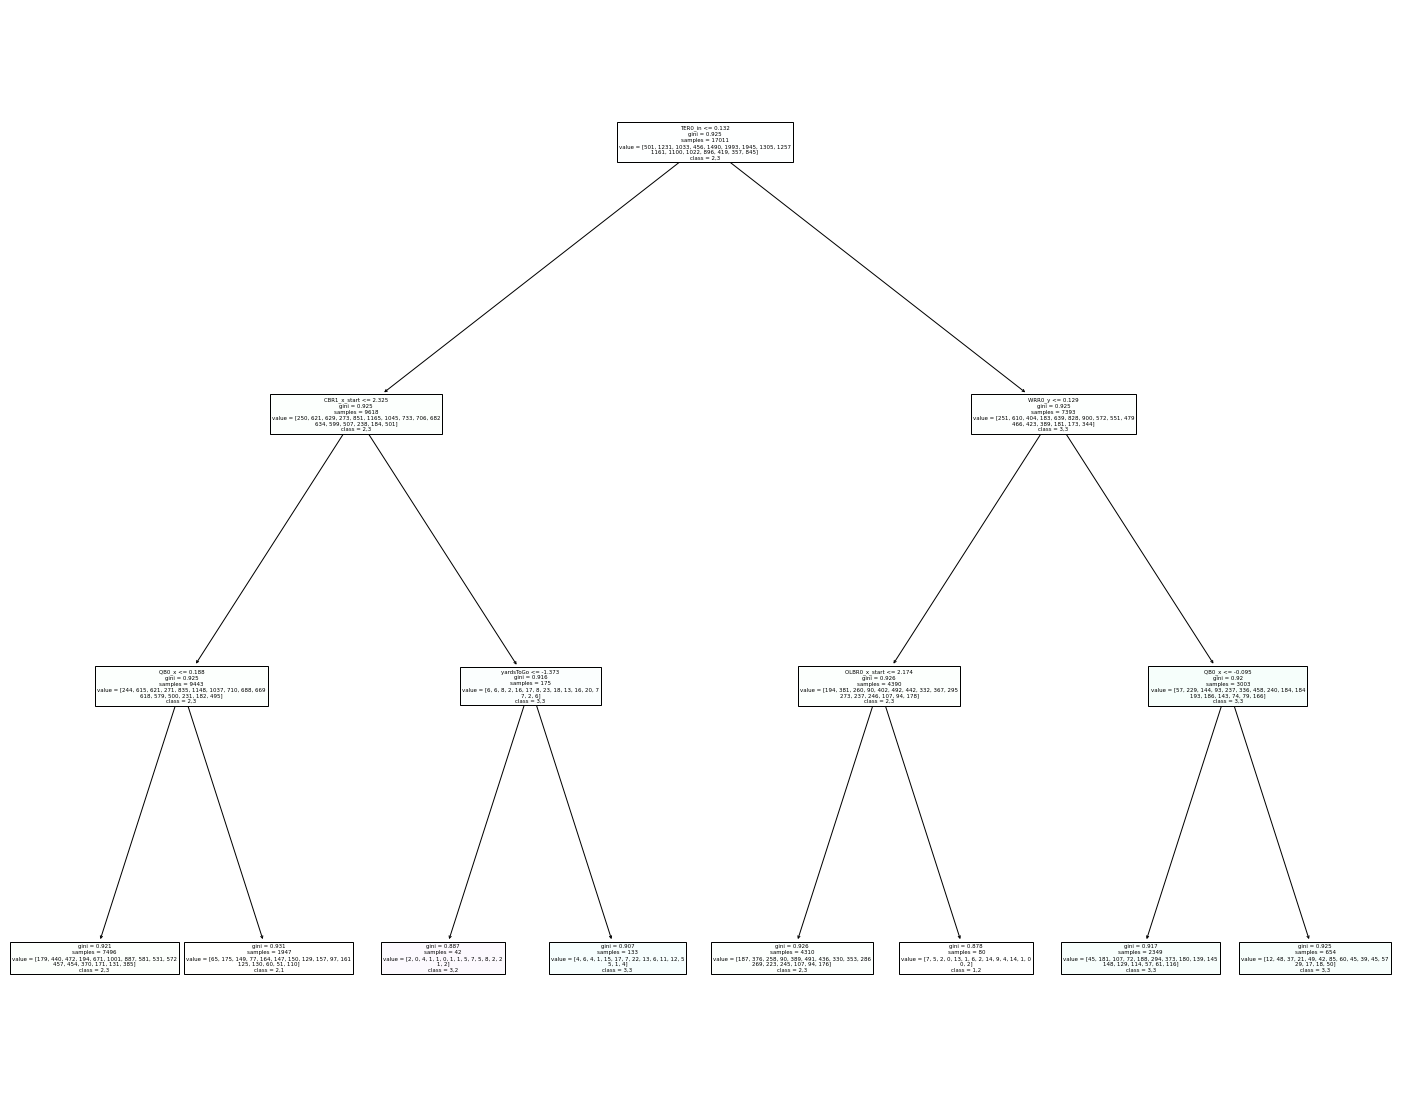

In [90]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


clf = DecisionTreeClassifier(max_depth= 3, max_features = "log2")
clf = clf.fit(model_scaled, y['class'])

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=dummy_model.columns,  
                   class_names=y['class'],
                   filled=True)

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(model_scaled, y)

ValueError: y should be a 1d array, got an array of shape (17011, 2) instead.